In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (10,6)
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [10]:
os.getcwd()

'/Users/rahuljain/Desktop/Python/MachineLearningwithPython/Time Series Forecasting/Airline_Passengers'

In [11]:
os.listdir()

['Untitled.ipynb',
 'international-airline-passengers.csv',
 '.ipynb_checkpoints']

In [12]:
dataset = pd.read_csv('international-airline-passengers.csv',header=None)
dataset = dataset.drop(index=144,axis=0)

In [13]:
dataset.columns = ['Month','#Passengers']

In [14]:
dataset['#Passengers'] = dataset['#Passengers'].astype('int64')

In [15]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [16]:
dataset.set_index('Month',inplace=True)

In [17]:
dataset.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


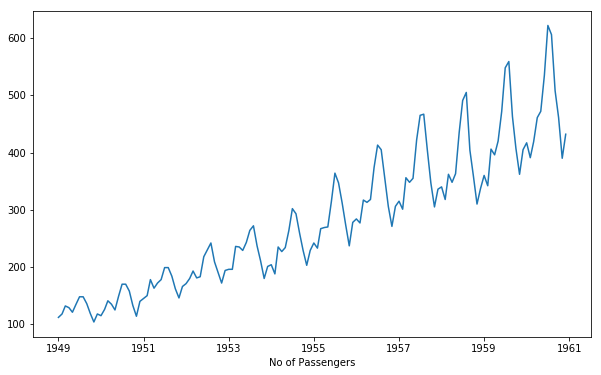

In [18]:
##plotting the graph
plt.xlabel('Month')
plt.xlabel('No of Passengers')
plt.plot(dataset)

# Observation - Data is Not Stationationary
Checks to be performed - Rolling Statistics & ADCF

In [19]:
##Rolling statistics
rolmean = dataset.rolling(window=12).mean()
rolstd = dataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

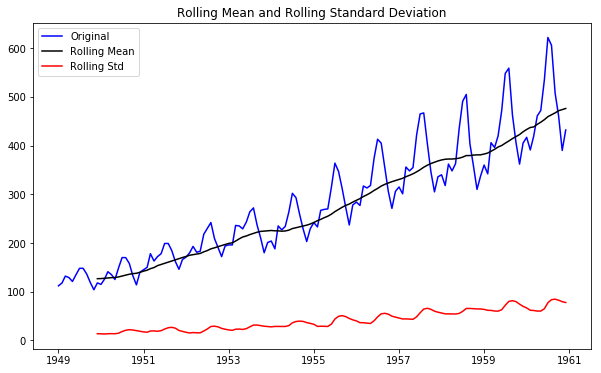

In [20]:
##Plotting rolling statistics
orig = plt.plot(dataset,color='blue',label = 'Original')
mean = plt.plot(rolmean,color='black',label = 'Rolling Mean')
std = plt.plot(rolstd,color='red',label = 'Rolling Std')
plt.legend(loc='left')
plt.title('Rolling Mean and Rolling Standard Deviation')
plt.show()

We see that the Rolling mean and Rolling std are not constant
hence Stationarity is not there 

In [26]:
from statsmodels.tsa.stattools import adfuller
print('Result of the Dicker Fuller Test')
dftest = adfuller(dataset['#Passengers'],autolag='AIC')
##dfoutput = 


Result of the Dicker Fuller Test


In [34]:
adf,pvalue,usedlag,nobs,critical_val,*c = dftest

In [44]:
print('Test Statistics : ', adf, '\n','pvalue:', pvalue,'\n', 'lag_used:' , usedlag, '\n', 'No of Obs: ',nobs )
for key,value in dftest[4].items():
    print('Critical '+ key,':', value)

Test Statistics :  0.8153688792060423 
 pvalue: 0.9918802434376409 
 lag_used: 13 
 No of Obs:  130
Critical 1% : -3.4816817173418295
Critical 5% : -2.8840418343195267
Critical 10% : -2.578770059171598


# Fail to reject the Null hypothesis - Data is not stationary
We see that the Test statistics value is very small as compared to the Critical Values and the p value is not at all significant.Hence we fail to reject the Null hypothesis that the data is Stationary.

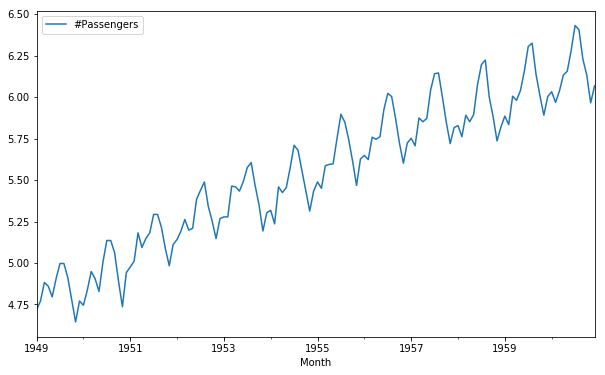

In [49]:
##Estimating the trend, We will take a log first and see 
dataset_logscale = np.log(dataset)
dataset_logscale.plot()

In [64]:
##Rolling statistics
moving_avg = dataset_logscale.rolling(window=12).mean()
moving_std = dataset_logscale.rolling(window=12).std()
print(moving_avg,moving_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01     4.836178
1950-01-01     4.838381
1950-02-01     4.843848
1950-03-01     4.849344
1950-04-01     4.853133
1950-05-01     4.855843
1950-06-01     4.864066
1950-07-01     4.875614
1950-08-01     4.887163
1950-09-01     4.899658
1950-10-01     4.908927
1950-11-01     4.916578
1950-12-01     4.930824
1951-01-01     4.950141
1951-02-01     4.964670
1951-03-01     4.984089
1951-04-01     4.999795
1951-05-01     5.026394
1951-06-01     5.041214
...                 ...
1958-07-01     5.919627
1958-08-01     5.926146
1958-09-01     5.926146
1958-10-01     5.928980
1958-11-01     5.930335
1958-12-01     5.930582
1959-01-01     5.935346
1959-02-01     5.941409
1959-03-01     5

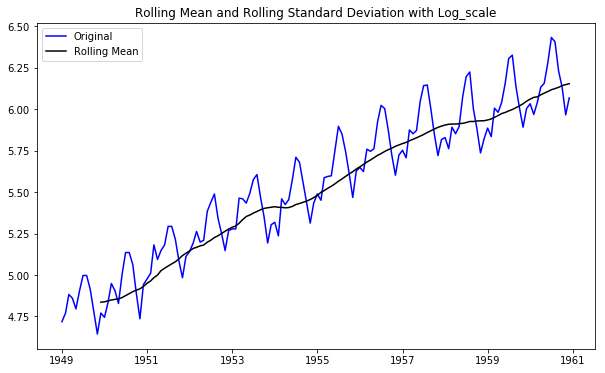

In [65]:
##Plotting rolling statistics
log_scale_pl = plt.plot(dataset_logscale,color='blue',label = 'Original')
moving_avg_pl = plt.plot(moving_avg,color='black',label = 'Rolling Mean')
##std = plt.plot(moving_std,color='red',label = 'Rolling Std')
plt.legend(loc='left')
plt.title('Rolling Mean and Rolling Standard Deviation with Log_scale')
plt.show()

##The data is still not stationary as the moving average line is having an upward trend

In [72]:
##Next we try Log_scale - Moving average which should be close to stationary 
#pd.concat((dataset_logscale, moving_avg), axis=1)
dataset_logscale_mv = dataset_logscale - moving_avg

In [74]:
dataset_logscale_mv.dropna(inplace=True)

# Test Statistics Function to plot the graph and perform Dicky Fuller Test

In [160]:
def test_statistics(df):
    m_avg = df.rolling(window=12).mean()
    m_std = df.rolling(window=12).std()
###Printing the plot
    plt.plot(df,color='blue',label='Original')
    plt.plot(m_avg,color='red',label='Moving Average')
    plt.plot(m_std,color='black',label='Moving Std')
    plt.title('Rolling Average & Std plot')
    plt.show()
##performing the dicky fuller test
    df.dropna(inplace=True)
    adf,pvalue,usedlag,nobs,critical_val,*c = adfuller(df['#Passengers'],autolag='AIC')
    print('Test Statistics : ', adf, '\n','pvalue:', pvalue,'\n', 'lag_used:' , usedlag, '\n', 'No of Obs: ',nobs )
    for key,value in dftest[4].items():
        print('Critical '+ key,':', value)

    
    

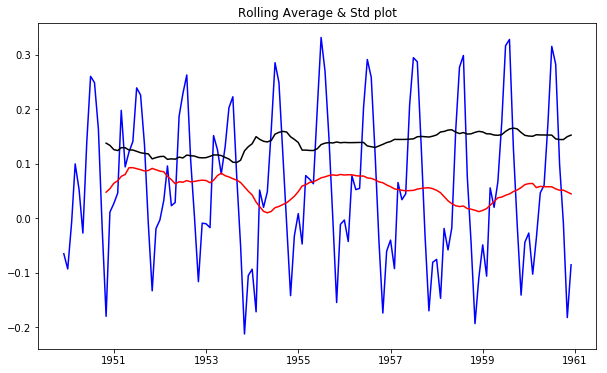

Test Statistics :  -3.162907991300858 
 pvalue: 0.022234630001243844 
 lag_used: 13 
 No of Obs:  119
Critical 1% : -3.4816817173418295
Critical 5% : -2.8840418343195267
Critical 10% : -2.578770059171598


In [161]:
##testing our Log_scale minus moving average model
test_statistics(dataset_logscale_mv)

# i want to check the same plot and test statistics without the log scale

In [85]:
moving_avg = dataset.rolling(window=12).mean()

In [86]:
dataset_org_m_avg = dataset - moving_avg

In [88]:
dataset_org_m_avg.dropna(inplace=True)

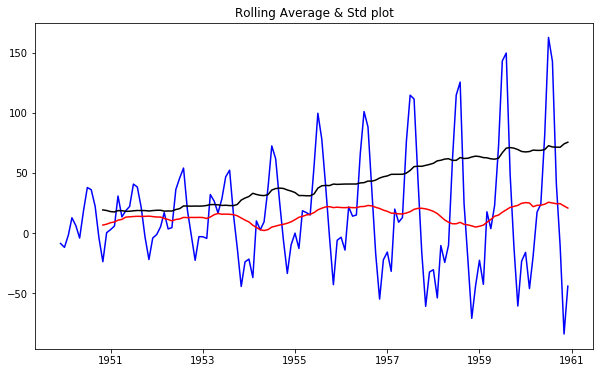

Test Statistics :  -3.164968129955147 
 pvalue: 0.02210413947387874 
 lag_used: 13 
 No of Obs:  119
Critical 1% : -3.4816817173418295
Critical 5% : -2.8840418343195267
Critical 10% : -2.578770059171598


In [89]:
test_statistics(dataset_org_m_avg)

This isnt bad either but the variance is increasing with time which was much better with log scale so lets stick with log scale

# The Data is Stationary now, as the plot is good, and pValue is below 0.05% , i.e the Alpha value

In [90]:
exp_decay_weighted_mean = dataset_logscale.ewm(halflife=12, min_periods=0, adjust=True).mean()

In [95]:
exp_decay_weighted_mean.tail()

,#Passengers
Month,
1960-08-01,6.046445
1960-09-01,6.056778
1960-10-01,6.061079
1960-11-01,6.055750
1960-12-01,6.056461


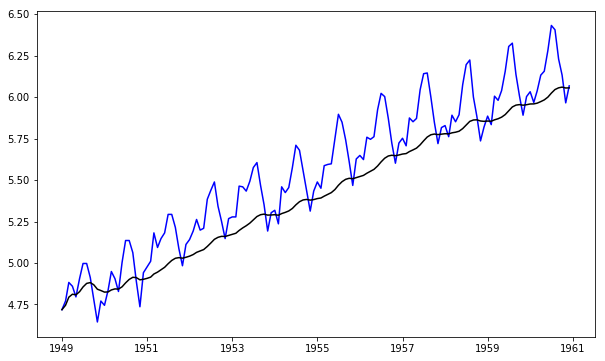

In [96]:
orig = plt.plot(dataset_logscale,color='blue',label = 'Original')
mean = plt.plot(exp_decay_weighted_mean,color='black',label = 'Rolling Mean')

In [97]:
logscale_exp_decay_weighted_mean = dataset_logscale - exp_decay_weighted_mean

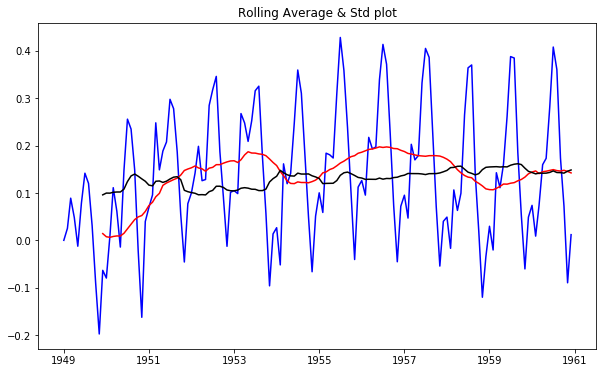

Test Statistics :  -3.60126242016168 
 pvalue: 0.005736938801511833 
 lag_used: 13 
 No of Obs:  130
Critical 1% : -3.4816817173418295
Critical 5% : -2.8840418343195267
Critical 10% : -2.578770059171598


In [99]:
test_statistics(logscale_exp_decay_weighted_mean)

In [112]:
dataset_logscale.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [118]:
dataset_logscale_shift_diff  =  dataset_logscale - dataset_logscale.shift(1)

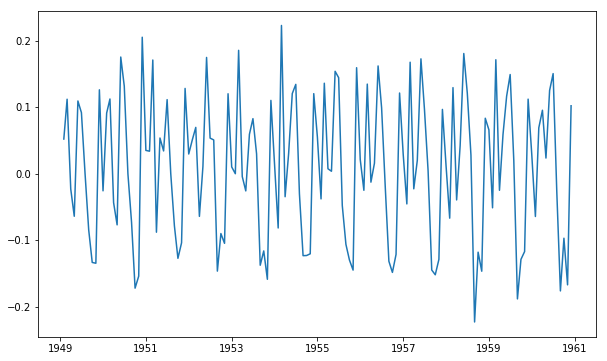

In [120]:
plt.plot(dataset_logscale_shift_diff)

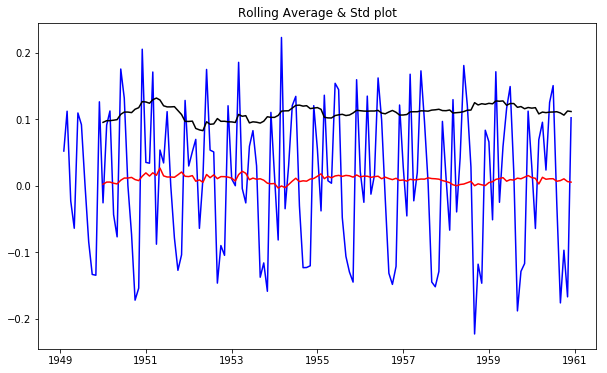

Test Statistics :  -2.717130598388145 
 pvalue: 0.0711205481508568 
 lag_used: 14 
 No of Obs:  128
Critical 1% : -3.4816817173418295
Critical 5% : -2.8840418343195267
Critical 10% : -2.578770059171598


In [162]:
test_statistics(dataset_logscale_shift_diff)

# Components of Time Series 

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset_logscale)

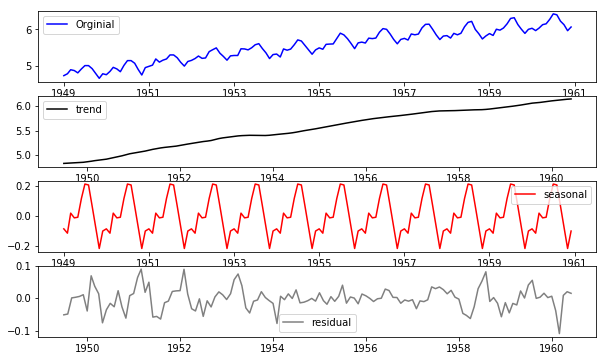

In [174]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset_logscale,color='blue',label='Orginial')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,color='black',label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,color='red',label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,color='grey',label='residual')
plt.legend(loc='best')

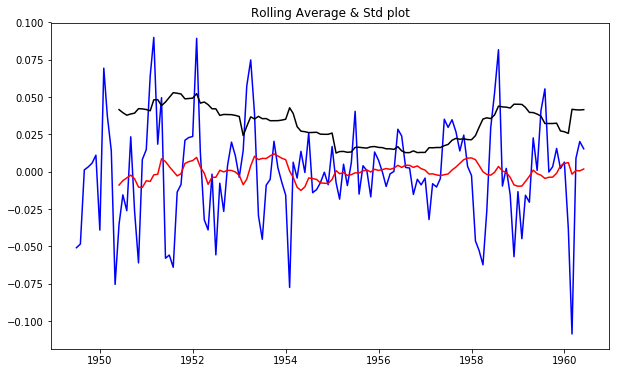

Test Statistics :  -6.332386797644867 
 pvalue: 2.8850589033233625e-08 
 lag_used: 9 
 No of Obs:  122
Critical 1% : -3.4816817173418295
Critical 5% : -2.8840418343195267
Critical 10% : -2.578770059171598


In [176]:
decompose_logdata = residual
decompose_logdata.dropna(inplace=True)
test_statistics(decompose_logdata)

# Above is the residual plot

# Now lets check the acf and pacf plot to check the values of P and Q

In [181]:
from statsmodels.tsa.stattools import acf, pacf
##Plots for acf and pacf 
lag_acf = acf(dataset_logscale_shift_diff,nlags=20)
lag_pacf = pacf(dataset_logscale_shift_diff,nlags=20,method='ols')

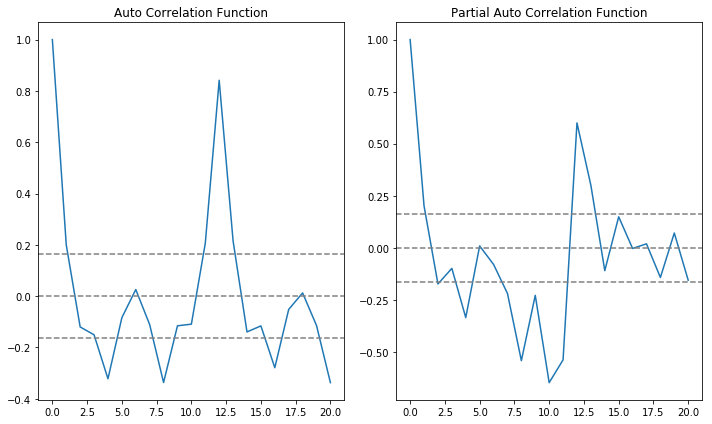

In [206]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle = 'dashed',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_logscale_shift_diff)),linestyle = 'dashed',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_logscale_shift_diff)),linestyle = 'dashed',color='gray')
plt.title('Auto Correlation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle = 'dashed',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_logscale_shift_diff)),linestyle = 'dashed',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_logscale_shift_diff)),linestyle = 'dashed',color='gray')
plt.title('Partial Auto Correlation Function')
plt.tight_layout()

# The graph first cuts the zero line at x value as 2, Same with PACF, Hence the values of P and Q are 2

Text(0.5,1,'RSS: 1.0292')

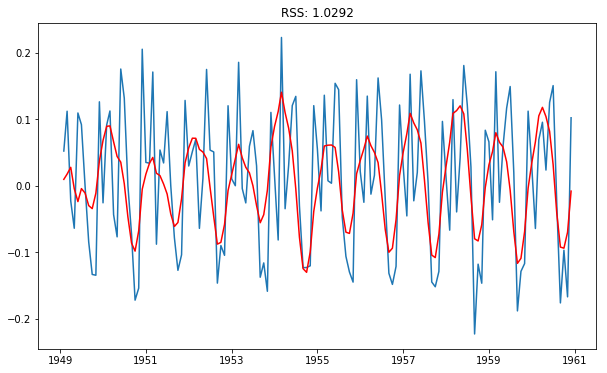

In [220]:
###ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dataset_logscale,order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(dataset_logscale_shift_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dataset_logscale_shift_diff['#Passengers'] )**2))

Text(0.5,1,'RSS: 1.5023')

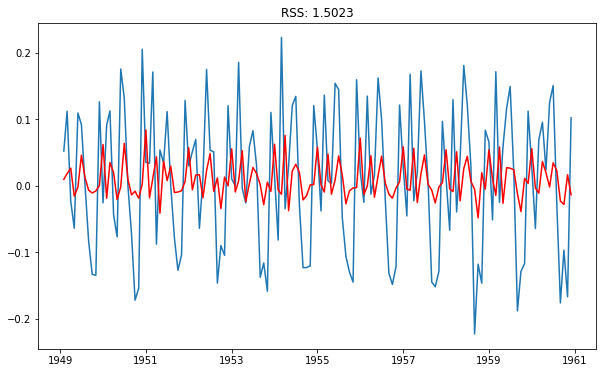

In [222]:
###AR Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dataset_logscale,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(dataset_logscale_shift_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dataset_logscale_shift_diff['#Passengers'] )**2))

Text(0.5,1,'RSS: 1.4721')

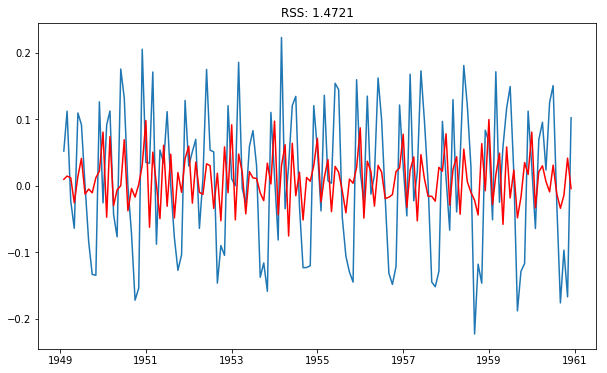

In [225]:
###MA Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(dataset_logscale,order=(0,1,2))
results_AR = model.fit(disp=-1)
plt.plot(dataset_logscale_shift_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dataset_logscale_shift_diff['#Passengers'] )**2))

In [230]:
Predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues,copy=True)
Predictions_ARIMA_diff.head()

Month
1949-02-01    0.009631
1949-03-01    0.014526
1949-04-01    0.011819
1949-05-01   -0.025744
1949-06-01    0.013877
dtype: float64

In [232]:
Predictions_ARIMA_diff_cumsum = Predictions_ARIMA_diff.cumsum()
Predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009631
1949-03-01    0.024156
1949-04-01    0.035975
1949-05-01    0.010231
1949-06-01    0.024108
dtype: float64

In [238]:
predictions_ARMIA_log = pd.Series(dataset_logscale['#Passengers'].ix[0], index=dataset_logscale.index)
predictions_ARMIA_log = predictions_ARMIA_log.add(Predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARMIA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728130
1949-03-01    4.742655
1949-04-01    4.754474
1949-05-01    4.728730
dtype: float64

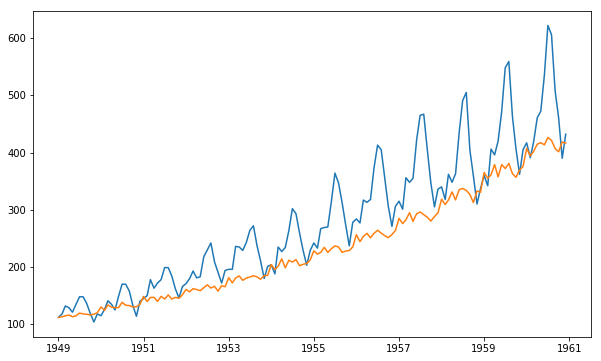

In [240]:
predictions_ARIMA = np.exp(predictions_ARMIA_log)
plt.plot(dataset)
plt.plot(predictions_ARIMA)

In [242]:
predictions_ARIMA.tail()

Month
1960-08-01    421.256062
1960-09-01    407.167787
1960-10-01    401.368176
1960-11-01    418.361641
1960-12-01    416.564018
dtype: float64

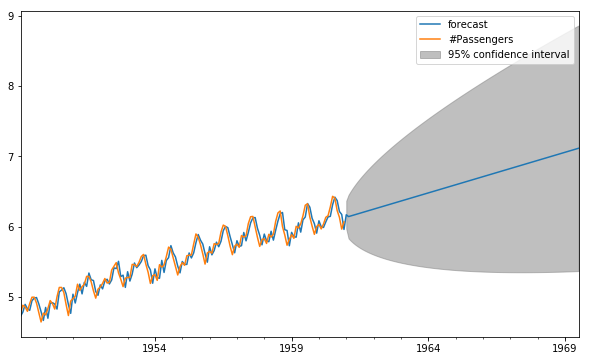

In [249]:
results_AR.plot_predict(1,246)
x=results_AR.forecast(steps=120)

In [250]:
x[1]

array([0.10140782, 0.15855371, 0.18100422, 0.20096212, 0.21910961,
       0.23586493, 0.25150649, 0.26623065, 0.2801821 , 0.29347105,
       0.30618377, 0.3183893 , 0.3301439 , 0.34149413, 0.35247906,
       0.36313184, 0.3734809 , 0.38355082, 0.39336303, 0.40293638,
       0.41228748, 0.42143115, 0.4303806 , 0.43914771, 0.44774318,
       0.45617672, 0.46445716, 0.47259253, 0.4805902 , 0.48845695,
       0.49619899, 0.50382208, 0.51133153, 0.51873228, 0.52602892,
       0.53322572, 0.54032668, 0.54733552, 0.55425573, 0.5610906 ,
       0.56784321, 0.57451645, 0.58111307, 0.58763564, 0.59408661,
       0.60046827, 0.60678282, 0.61303233, 0.61921877, 0.62534401,
       0.63140983, 0.63741793, 0.64336993, 0.64926737, 0.65511172,
       0.66090439, 0.66664673, 0.67234002, 0.67798551, 0.68358437,
       0.68913775, 0.69464674, 0.70011238, 0.70553567, 0.7109176 ,
       0.71625909, 0.72156103, 0.72682431, 0.73204974, 0.73723813,
       0.74239027, 0.7475069 , 0.75258874, 0.75763649, 0.76265

In [251]:
np.exp(x[1])

array([1.10672789, 1.17181486, 1.19842023, 1.22257846, 1.24496773,
       1.2660033 , 1.28596124, 1.30503603, 1.32337077, 1.34107435,
       1.35823189, 1.37491141, 1.3911683 , 1.40704834, 1.42258987,
       1.43782541, 1.45278281, 1.46748612, 1.48195629, 1.49621169,
       1.51026855, 1.52414127, 1.53784272, 1.55138442, 1.56477678,
       1.5780292 , 1.59115021, 1.60414761, 1.6170285 , 1.62979942,
       1.64246636, 1.65503487, 1.66751005, 1.67989666, 1.69219909,
       1.70442144, 1.71656754, 1.72864094, 1.74064499, 1.75258282,
       1.76445737, 1.77627141, 1.78802752, 1.79972818, 1.81137569,
       1.82297224, 1.83451991, 1.84602066, 1.85747635, 1.86888876,
       1.88025956, 1.89159036, 1.90288267, 1.91413796, 1.9253576 ,
       1.93654293, 1.9476952 , 1.95881563, 1.96990538, 1.98096554,
       1.9919972 , 2.00300137, 2.01397902, 2.02493109, 2.0358585 ,
       2.04676211, 2.05764275, 2.06850124, 2.07933834, 2.09015481,
       2.10095136, 2.11172869, 2.12248747, 2.13322835, 2.14395